In [ ]:
import pandas as pd
import numpy as np

from collections import defaultdict

import torch
import torch.nn as nn
from torch import vmap

from sklearn.linear_model import LinearRegression, RANSACRegressor, BayesianRidge

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import tqdm

In [ ]:
x = np.linspace(-6, 6, 10000)
y = np.linspace(-6, 6, 10000)

In [ ]:
x_s = np.linspace(-5.0, 5.0, 10000)
y_s = np.linspace(-5.0, 5.0, 10000)

xv, yv = np.meshgrid(x_s, y_s)

yv.shape

(10000, 10000)

In [ ]:
INPUT_DIM = 2
simple_network = MLP_ReLU(INPUT_DIM, [10, 1])

In [ ]:
model = lambda x: 6 * x**6 + 2

In [ ]:
complex_step_gradient(model, np.array([10]))

array([[3600000.4789271]])

In [ ]:
model(np.array([10]))

array([6000002])

In [ ]:
compute_gradient_vmap(model, np.array([12]), 5e-5)

TypeError: ignored

In [ ]:
compute_second_order_gradient(model, np.array([10]), 0.005)

float64


array([[1800001.80001371]])

In [ ]:
import torch.nn as nn

# Create a simple deep ReLU network
model = nn.Sequential(
    nn.Linear(2, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
)

# Manually set the weights and biases for a predictable outcome
with torch.no_grad():
    model[0].weight.copy_(torch.tensor([[1.0, 1.0], [-1.0, -1.0], [1.0, -1.0]]))
    model[0].bias.copy_(torch.tensor([0.0, 0.0, 0.0]))
    model[2].weight.copy_(torch.tensor([[1.0, -1.0, 1.0], [-1.0, 1.0, -1.0]]))
    model[2].bias.copy_(torch.tensor([0.0, 0.0]))
    model[4].weight.copy_(torch.tensor([[1.0, -1.0]]))
    model[4].bias.copy_(torch.tensor([0.0]))

# Test differentiability at different input points
x1 = np.array([1.0, 2.0])
x2 = np.array([0.5, 1.5])

print("x1 differentiable:", is_function_differentiable(model, x1))
print("x2 differentiable:", is_function_differentiable(model, x2))


x1 differentiable: True
x2 differentiable: False


In [ ]:
# Test Case 1: A simple deep ReLU network where the hyperplane continues
model_1 = SimpleContinuingNetwork()
intersection_point_1 = np.array([0.0, 0.0])
hyperplane_params_1 = find_hyperplane_parameters_regression(model_1, intersection_point_1)
print("Test Case 1 (Continuing Hyperplane):", does_hyperplane_bend(model_1, intersection_point_1, hyperplane_params_1, 2))

# Test Case 2: A deep ReLU network where the hyperplane bends
model_2 = BendingNetwork()
intersection_point_2 = np.array([0.0, 0.0])
hyperplane_params_2 = find_hyperplane_parameters_regression(model_2, intersection_point_2)
print("Test Case 2 (Bending Hyperplane):", does_hyperplane_bend(model_2, intersection_point_2, hyperplane_params_2, 2))

[array([0.99998785, 1.21584148]) 0.004054188347787549]
[[0.70710677]
 [0.70710677]]


/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2500: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = asarray(x)
<ipython-input-53-807dc2339459>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  normal_vector_normalized = normal_vector / np.linalg.norm(normal_vector)


TypeError: ignored

In [ ]:
# Create a more complex deep ReLU network
complex_model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
)

# Set the weights and biases manually for easier testing
complex_model[0].weight.data = torch.tensor([[1, 0], [0, 1], [-1, 0], [0, -1]], dtype=torch.float32)
complex_model[0].bias.data = torch.tensor([-0.5, -0.5, -0.5, -0.5], dtype=torch.float32)
complex_model[2].weight.data = torch.tensor([[1, 0, 0, 0], [0, 1, 0, 0]], dtype=torch.float32)
complex_model[2].bias.data = torch.tensor([0, 0], dtype=torch.float32)
complex_model[4].weight.data = torch.tensor([[1, 1]], dtype=torch.float32)
complex_model[4].bias.data = torch.tensor([-0.5], dtype=torch.float32)

# Define the starting point and the direction vector
start_point = np.array([0.25, 0.25])
direction_vector = np.array([1, 1])

# Call the find_intersection_on_hyperplane function
intersection_point = find_intersection_on_hyperplane(complex_model, start_point, direction_vector, 0, 1, n_dim=2, epsilon=1e-6, num_steps=10)

# Print the intersection point
print("Intersection point:", intersection_point)

# Compare the result with the expected intersection point
expected_intersection_point = np.array([0.5, 0.5])
print("Expected intersection point:", expected_intersection_point)
print("Are the intersection points close?", np.allclose(intersection_point, expected_intersection_point, atol=1e-6))


Intersection point: [0.5 0.5]
Expected intersection point: [0.5 0.5]
Are the intersection points close? True


8.7265465259552


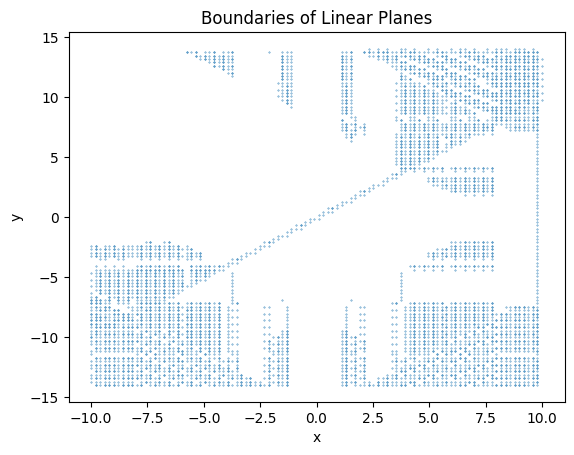

In [ ]:
t_ = time.time()
boundary_points = find_2d_boundaries_v3(model, x_range=(-10, 10), y_range=(-14, 14), num_points_per_dim=100)
print(time.time() - t_)
plt.scatter(*zip(*boundary_points), s=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boundaries of Linear Planes")
plt.show()


160000it [02:25, 1099.51it/s]


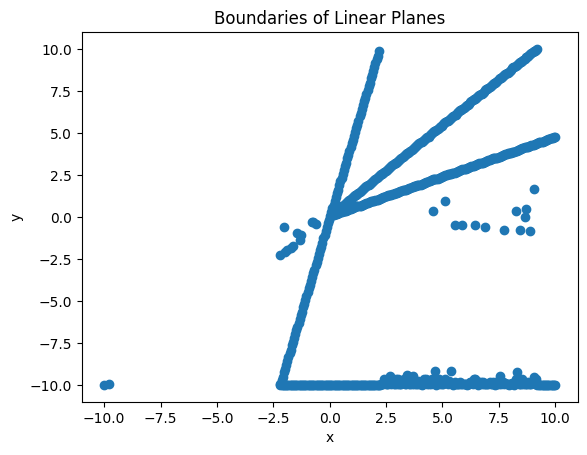

In [ ]:
boundaries = find_2d_boundaries(simple_network, x_range=(-10, 10), y_range=(-10, 10), num_points_per_dim=500)
boundary_points = [point for point, grad in boundaries]

plt.scatter(*zip(*boundary_points))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boundaries of Linear Planes")
plt.show()


In [ ]:
# Example usage:
cube_length = 8
step_size = 0.01
epsilon = 1e-6
grad_threshold = 1e-2
similarity_threshold = 1e-2
edge_hyperplanes = traverse_cube_edges(simple_network, INPUT_DIM, cube_length, step_size, epsilon, grad_threshold, similarity_threshold)
edge_hyperplanes


defaultdict(list,
            {0: [(array([0.9536743 , 0.23841858], dtype=float32),
               0.1050114631652832),
              (array([0.9536743 , 0.35762787], dtype=float32),
               0.10474324226379395),
              (array([0.834465  , 0.23841858], dtype=float32),
               -0.3690533638000484),
              (array([0.834465  , 0.35762787], dtype=float32),
               -0.3681292533874503),
              (array([1.0728836 , 0.23841858], dtype=float32),
               0.5701682567596453),
              (array([1.0728836 , 0.35762787], dtype=float32),
               0.5599479675293004),
              (array([0.834465  , 0.11920929], dtype=float32),
               -0.2442951202392334),
              (array([0.9536743 , 0.11920929], dtype=float32),
               0.06722950935366656),
              (array([1.0728836 , 0.11920929], dtype=float32),
               0.3745214939117756),
              (array([1.013279  , 0.11920929], dtype=float32),
               0.177

In [ ]:
# Test the traverse_cube_edges function
INPUT_DIM_3D = 3
cube_length = 10
step_size = 0.01
epsilon = 1e-6
grad_threshold = 1e-5
similarity_threshold = 1e-5
edge_hyperplanes_3d = traverse_cube_edges(simple_3d_network, INPUT_DIM_3D, cube_length, step_size, epsilon, grad_threshold, similarity_threshold)

edge_hyperplanes_3d

defaultdict(list,
            {0: [(array([0., 0., 0.], dtype=float32), 0.0),
              (array([0.9536743 , 0.47683716, 0.47683716], dtype=float32),
               -1.9073486328123577),
              (array([1.9073486, 0.9536743, 0.9536743], dtype=float32),
               -3.808211803435992),
              (array([2.1457672, 0.9536743, 0.9536743], dtype=float32),
               -4.316314697265297),
              (array([2.3841858, 0.9536743, 0.9536743], dtype=float32),
               -5.540584564208526)],
             1: [(array([0., 0., 0.], dtype=float32), 0.0),
              (array([0.47683716, 0.9536743 , 0.47683716], dtype=float32),
               -1.9073486328123577),
              (array([0.9536743, 1.9073486, 0.9536743], dtype=float32),
               -3.808211803435992),
              (array([0.9536743, 2.1457672, 0.9536743], dtype=float32),
               -4.316314697265297),
              (array([0.9536743, 2.3841858, 0.9536743], dtype=float32),
               -5.5405845

In [ ]:
edge_hyperplanes = traverse_cube_edges(simple_network, n_dim=INPUT_DIM, cube_length=1, step_size=0.1, epsilon=1e-5)
edge_hyperplanes

defaultdict(list,
            {0: [(array([ 0.77905136, -0.31902456], dtype=float32),
               0.00067137461155653)],
             1: [(array([ 0.77905136, -0.31902456], dtype=float32),
               0.00067137461155653)]})

In [ ]:
similar_hyperplanes = find_similar_hyperplanes(edge_hyperplanes, similarity_threshold=1e-4)

print("Similar Hyperplanes:", similar_hyperplanes)

Similar Hyperplanes: []


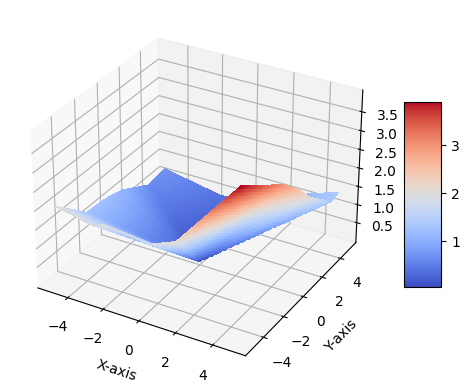

In [ ]:

# Create and train your 2D input deep ReLU network
# simple_network = ...

# Visualize the output surface
visualize_surface(simple_network)


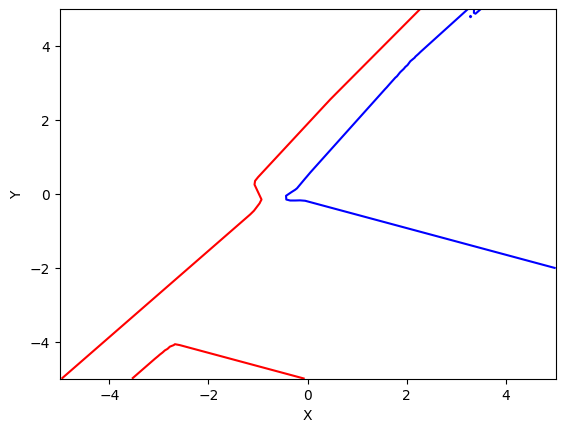

In [ ]:


# Visualize the boundaries of the simple_network
visualize_boundaries(simple_network)


In [ ]:
x_range = [-2, 2]
y_range = [-2, 2]
num_points = 100

visualize_boundaries(simple_network, x_range, y_range, num_points)


TypeError: ignored

In [ ]:
# Example usage:
n_points = 10
n_dim = 2
lower_bound = -10
upper_bound = 10
points = generate_points(n_points, n_dim, lower_bound, upper_bound)

# Define your model_function
def model_function(x):
    return np.sum(x**2)

# Find the hyperplanes for each point
hyperplanes = [estimate_hyperplane(point, model_function) for point in points]

for i, (point, (normal_vector, offset)) in enumerate(zip(points, hyperplanes)):
    print(f"Point {i + 1}: {point}")
    print(f"Estimated normal vector: {normal_vector}")
    print(f"Estimated offset: {offset}")
    print()


Point 1: [-6.66873114  0.12746732]
Estimated normal vector: [-13.33746317   0.25494297]
Estimated offset: -44.4882299458597

Point 2: [ 2.19940367 -3.45379238]
Estimated normal vector: [ 4.39881202 -6.90759272]
Estimated offset: -16.766096098322905

Point 3: [-5.34529594 -8.04957198]
Estimated normal vector: [-10.69059465 -16.0991403 ]
Estimated offset: -93.36778308431123

Point 4: [-8.94067352 -3.43491929]
Estimated normal vector: [-17.88134476  -6.86984492]
Estimated offset: -91.73431495218865

Point 5: [-0.73766311  0.17372959]
Estimated normal vector: [-1.47532804  0.34746111]
Estimated offset: -0.5743305090566682

Point 6: [ 2.29603783 -9.45350221]
Estimated normal vector: [  4.59208093 -18.9070004 ]
Estimated offset: -94.64046784967202

Point 7: [ 0.6762353  -8.24537751]
Estimated normal vector: [  1.35247007 -16.49075113]
Estimated offset: -68.44351204925243

Point 8: [-7.30213948 -3.4817255 ]
Estimated normal vector: [-14.60427704  -6.96346226]
Estimated offset: -65.44367860363

In [ ]:
# Calculate the radii
radii = calculate_radii(points, hyperplanes, model_function)

for i, (point, radius) in enumerate(zip(points, radii)):
    print(f"Point {i + 1}: {point}")
    print(f"Radius: {radius}")
    print()


Point 1: [-6.66873114  0.12746732]
Radius: 50.21380094750066

Point 2: [ 2.19940367 -3.45379238]
Radius: 55.476229658044716

Point 3: [-5.34529594 -8.04957198]
Radius: 90.80950873610433

Point 4: [-8.94067352 -3.43491929]
Radius: 64.32450747741831

Point 5: [-0.73766311  0.17372959]
Radius: 53.6991641125464

Point 6: [ 2.29603783 -9.45350221]
Radius: 50.148388757934725

Point 7: [ 0.6762353  -8.24537751]
Radius: 86.201279294512

Point 8: [-7.30213948 -3.4817255 ]
Radius: 55.382976630444645

Point 9: [5.92502824 8.08871485]
Radius: 52.076256373952184

Point 10: [-1.31435695 -4.08368001]
Radius: 21.663992788689804



In [ ]:
# Generate a set of points and corresponding hyperplanes
num_points = 50
points = np.random.rand(num_points, 2)
hyperplanes = [find_hyperplane_parameters_regression(simple_network, point) for point in points]


100%|██████████| 400/400 [09:22<00:00,  1.41s/it]


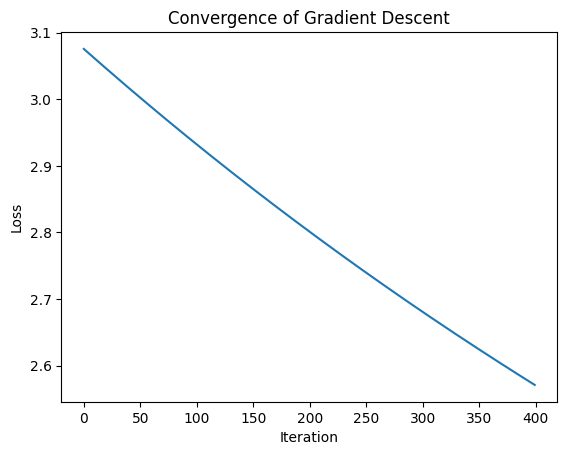

Model output: tensor([0.2507], grad_fn=<AddBackward0>), Optimized output: 0.0025608452287685874
Model output: tensor([0.2465], grad_fn=<AddBackward0>), Optimized output: 0
Model output: tensor([0.1997], grad_fn=<AddBackward0>), Optimized output: 0.004369717428194003
Model output: tensor([0.1122], grad_fn=<AddBackward0>), Optimized output: 0
Model output: tensor([0.2218], grad_fn=<AddBackward0>), Optimized output: 0
Model output: tensor([0.1326], grad_fn=<AddBackward0>), Optimized output: 0
Model output: tensor([0.1644], grad_fn=<AddBackward0>), Optimized output: 0.0013449787095939853
Model output: tensor([0.0935], grad_fn=<AddBackward0>), Optimized output: 0
Model output: tensor([0.1783], grad_fn=<AddBackward0>), Optimized output: 0
Model output: tensor([0.0887], grad_fn=<AddBackward0>), Optimized output: 0.056236770232371384
Model output: tensor([0.2135], grad_fn=<AddBackward0>), Optimized output: 0.010568926887745304
Model output: tensor([0.1769], grad_fn=<AddBackward0>), Optimized o

In [ ]:
# Initialize the model and define a function to use it with NumPy arrays
model = SimpleNN()

def model_function(x):
    return model(torch.tensor(x, dtype=torch.float32))


# Calculate the radii for each point
radii = calculate_radii(points, hyperplanes, simple_network)

# Perform gradient descent optimization
initial_weights = np.ones(len(points)) / len(points)
learning_rate = 4e-2
num_iterations = 400
optimized_weights, losses = gradient_descent(points, radii, hyperplanes, simple_network, initial_weights, learning_rate, num_iterations)

# Plot the convergence
plt.plot(np.array(losses))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Convergence of Gradient Descent")
plt.show()

# Validate the final resulting weights
validation_points = np.random.rand(50, 2)
for x in validation_points:
    model_output = model_function(x)
    optimized_output = sum([optimized_weights[i] * (np.dot(hyperplanes[i][0], x - points[i]) + hyperplanes[i][1]) if np.linalg.norm(x - points[i]) <= radii[i] else 0 for i in range(len(points))])
    print(f"Model output: {model_output}, Optimized output: {optimized_output}")


In [ ]:
# Create a validation dataset
num_validation_points = 100
validation_points = np.random.rand(num_validation_points, 2)

# Compute the mean squared error (MSE) between the model output and the optimized output
mse = 0
for x in validation_points:
    model_output = model_function(x)
    optimized_output = sum([optimized_weights[i] * (np.dot(hyperplanes[i][0], x - points[i]) + hyperplanes[i][1]) if np.linalg.norm(x - points[i]) <= radii[i] else 0 for i in range(len(points))])
    mse += (model_output - optimized_output) ** 2

mse /= num_validation_points
print(f"Mean squared error (MSE) between model output and optimized output: {mse}")


Mean squared error (MSE) between model output and optimized output: tensor([0.0357], grad_fn=<DivBackward0>)


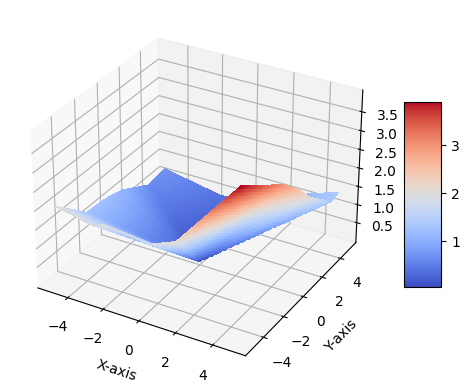

In [ ]:
visualize_surface(simple_network)

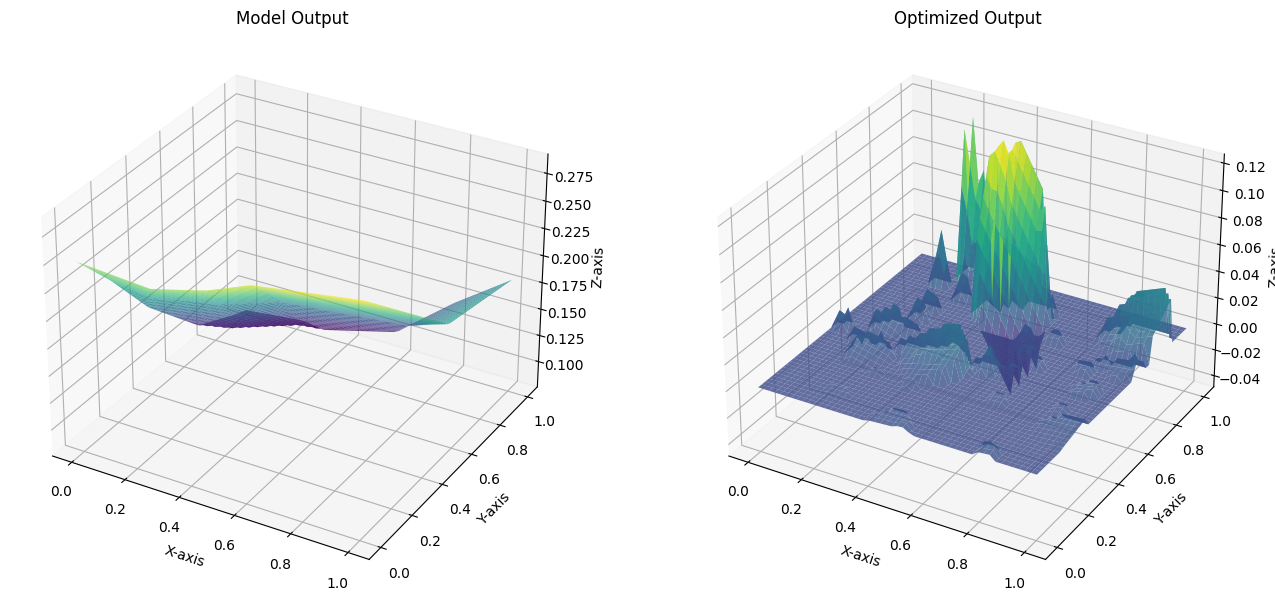

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of points in the input space
grid_size = 50
x_range = np.linspace(0, 1, grid_size)
y_range = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute the model output and optimized output for each point in the grid
model_output_grid = np.zeros((grid_size, grid_size))
optimized_output_grid = np.zeros((grid_size, grid_size))

for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        point = np.array([x, y])
        model_output_grid[i, j] = model_function(point)
        optimized_output_grid[i, j] = sum([optimized_weights[k] * (np.dot(hyperplanes[k][0], point - points[k]) + hyperplanes[k][1]) if np.linalg.norm(point - points[k]) <= radii[k] else 0 for k in range(len(points))])

# Create a 3D plot of the model output and optimized output
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, model_output_grid, cmap='viridis', alpha=0.8)
ax1.set_title("Model Output")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, optimized_output_grid, cmap='viridis', alpha=0.8)
ax2.set_title("Optimized Output")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")

plt.show()


In [ ]:
# Parameters for gradient descent
alpha = 0.01
num_iterations = 800
lambda_lasso = 1

# Optimize the objective function with Lasso regularization using gradient descent
optimized_weights_with_lasso = np.ones(len(points)) / len(points)
for _ in tqdm.tqdm(range(num_iterations)):
    grad = gradient_with_lasso(optimized_weights_with_lasso, points, hyperplanes, radii, simple_network, lambda_lasso)
    optimized_weights_with_lasso -= alpha * grad


100%|██████████| 800/800 [17:14<00:00,  1.29s/it]


In [ ]:
non_zero_weights = np.sum(np.abs(optimized_weights_with_lasso) > 5e-3)
print(non_zero_weights)

13


In [ ]:
print(optimized_weights_with_lasso)

[ 0.00670321  0.00063906  0.00241262  0.00291065  0.00202462  0.00637314
  0.00275831  0.00400675  0.00492222  0.00379467  0.00747443  0.0027919
  0.00823115  0.00320166  0.00282676  0.00162688  0.00404631  0.00119249
  0.00481647  0.00075962  0.00569561  0.00242884  0.00195806  0.00316915
  0.00430939  0.00353786  0.00520549  0.00303558  0.00227046  0.00523
  0.00097979  0.00204653  0.00513033 -0.00787816  0.00550788  0.00227501
  0.00083159  0.00217247  0.00178418  0.00442586  0.00244472  0.00591937
  0.00226583  0.00372124  0.0056921   0.00270905  0.00545533  0.00130939
  0.00394461  0.00374447]


In [ ]:
# Parameters for gradient descent
alpha = 0.01
num_iterations = 800
lambda_l2 = 1

optimized_weights_with_lasso = np.ones(len(points)) / len(points)


gradient_descent_l2_loss(optimized_weights_with_lasso, points, hyperplanes, radii, simple_network, lambda_l2, alpha, num_iterations)

100%|██████████| 800/800 [17:31<00:00,  1.31s/it]


array([4.18853395e-04, 3.98364386e-05, 1.50630975e-04, 1.81841288e-04,
       1.26427245e-04, 3.98268302e-04, 1.72364336e-04, 2.50288311e-04,
       3.07385922e-04, 2.37035201e-04, 4.67042742e-04, 1.74425334e-04,
       5.14051651e-04, 2.00025172e-04, 1.76596973e-04, 1.01606738e-04,
       2.52829965e-04, 1.32406413e-03, 3.00990719e-04, 1.29733741e-03,
       3.55934331e-04, 1.51723389e-04, 1.22322349e-04, 1.97894919e-04,
       2.69294983e-04, 2.21047375e-04, 3.25306785e-04, 1.89525517e-04,
       1.41823683e-04, 3.26838885e-04, 6.11660986e-05, 1.27825505e-04,
       3.20609195e-04, 7.57367363e-04, 3.44208013e-04, 1.42155970e-04,
       5.19369769e-05, 1.35724731e-04, 1.11426202e-04, 2.76575485e-04,
       1.52763695e-04, 3.69914636e-04, 1.41533790e-04, 2.32510203e-04,
       3.55707088e-04, 1.69250553e-04, 3.40863260e-04, 8.17480367e-05,
       2.46502226e-04, 2.33983910e-04])

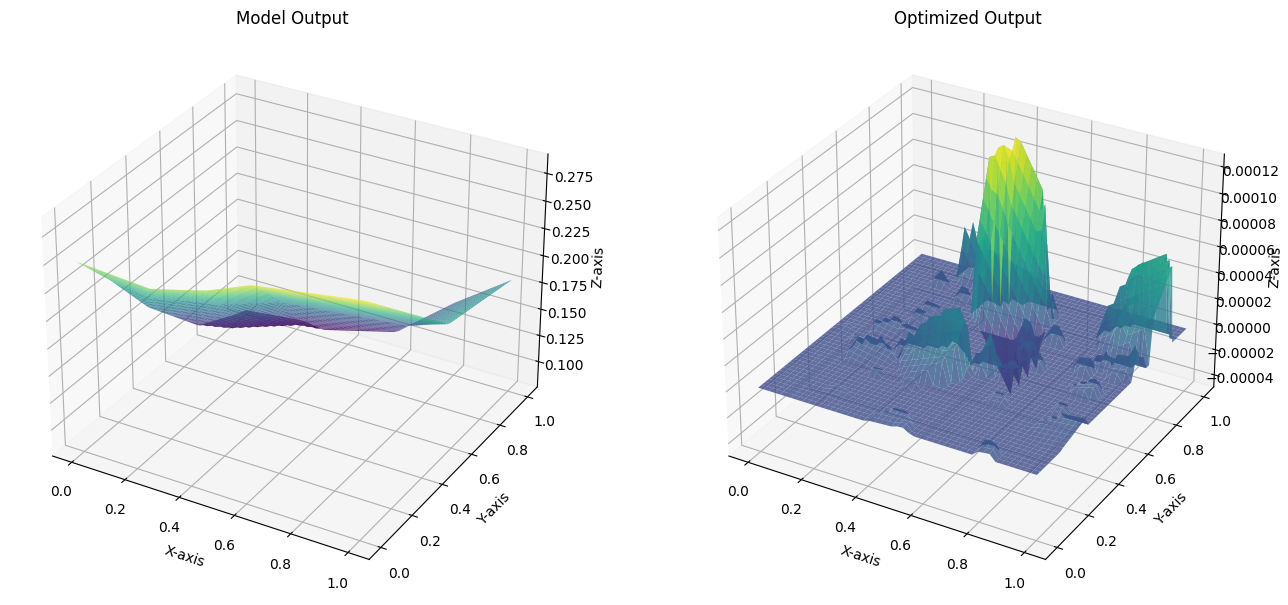

In [ ]:
# Create a grid of points in the input space
grid_size = 50
x_range = np.linspace(0, 1, grid_size)
y_range = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Compute the model output and optimized output for each point in the grid
model_output_grid = np.zeros((grid_size, grid_size))
optimized_output_grid = np.zeros((grid_size, grid_size))

for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        point = np.array([x, y])
        model_output_grid[i, j] = model_function(point)
        optimized_output_grid[i, j] = sum([optimized_weights_with_lasso[k] * (np.dot(hyperplanes[k][0], point - points[k]) + hyperplanes[k][1]) if np.linalg.norm(point - points[k]) <= radii[k] else 0 for k in range(len(points))])

# Create a 3D plot of the model output and optimized output
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, model_output_grid, cmap='viridis', alpha=0.8)
ax1.set_title("Model Output")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, optimized_output_grid, cmap='viridis', alpha=0.8)
ax2.set_title("Optimized Output")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")

plt.show()


In [ ]:
# Create a validation dataset
validation_data = [(np.random.uniform(-10, 10, 2), model_function(torch.tensor(np.random.uniform(-10, 10, 2))).detach().numpy()) for _ in range(1000)]

# Calculate the accuracy of the optimized weights without Lasso regularization
accuracy = calculate_accuracy(optimized_weights, hyperplanes, points, radii, validation_data)
print("Accuracy without Lasso regularization:", accuracy)

# Calculate the accuracy of the optimized weights with Lasso regularization
accuracy_lasso = calculate_accuracy(optimized_weights_with_lasso, hyperplanes, points, radii, validation_data)
print("Accuracy with Lasso regularization:", accuracy_lasso)


<ipython-input-25-5d053a009887>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return model(torch.tensor(x, dtype=torch.float32))


Accuracy without Lasso regularization: 0.0
Accuracy with Lasso regularization: 0.0


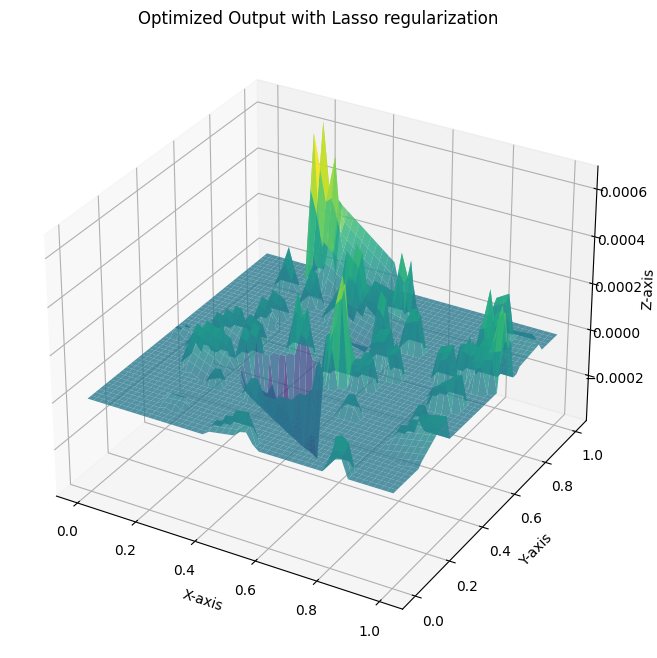

In [ ]:
# Visualize the optimized output with Lasso regularization
optimized_output_grid_lasso = np.zeros((grid_size, grid_size))

for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        point = np.array([x, y])
        optimized_output_grid_lasso[i, j] = sum([optimized_weights_with_lasso[k] * (np.dot(hyperplanes[k][0], point - points[k]) + hyperplanes[k][1]) if np.linalg.norm(point - points[k]) <= radii[k] else 0 for k in range(len(points))])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, optimized_output_grid_lasso, cmap='viridis', alpha=0.8)
ax.set_title("Optimized Output with Lasso regularization")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()


In [ ]:
# Count the number of non-zero weights
non_zero_weights = np.sum(optimized_weights_lasso != 0)
print("Number of non-zero weights:", non_zero_weights)

# Get the number of layers in the first layer of the network
first_layer_neurons = len(model.layer1)
print("Number of layers in the first layer of the network:", first_layer_neurons)

# Test the main conjecture
if non_zero_weights == first_layer_neurons:
    print("The main conjecture is true.")
else:
    print("The main conjecture is false.")


NameError: ignored

In [ ]:
lambd = 0.01  # Regularization parameter
initial_weights = np.random.rand(len(points))  # Random initial weights
res = minimize(l1_regularized_objective_function, initial_weights, args=(hyperplanes, points, radii, lambd), method='BFGS')
optimized_weights = res.x

print("Optimized Weights:", optimized_weights)


# Validation dataset
validation_points = [np.random.rand(2) for _ in range(1000)]

# Evaluate the optimized weights on the validation dataset
true_output = [model_function(point) for point in validation_points]
optimized_output = [sum([optimized_weights[k] * (np.dot(hyperplanes[k][0], point - points[k]) + hyperplanes[k][1]) if np.linalg.norm(point - points[k]) <= radii[k] else 0 for k in range(len(points))]) for point in validation_points]

# Calculate the accuracy
accuracy = np.mean(np.isclose(true_output, optimized_output, rtol=1e-1, atol=1e-1))
print("Accuracy:", accuracy)

# Visualize the resulting surface in 3D space
# ... (reuse the previous 3D visualization code and update the optimized_output_grid) ...


RuntimeError: ignored